In [204]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing, linear_model, cross_validation, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

ImportError: cannot import name model_selection

In [186]:
df = pd.read_csv(os.path.join('dataset-17-ames-housing.csv'), index_col='Order')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,...,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,...,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,...,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,...,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,...,3,2010,WD,Normal,189900
6,527105030,60,RL,78.0,9978,...,6,2010,WD,Normal,195500
7,527127150,120,RL,41.0,4920,...,4,2010,WD,Normal,213500
8,527145080,120,RL,43.0,5005,...,1,2010,WD,Normal,191500
9,527146030,120,RL,39.0,5389,...,3,2010,WD,Normal,236500


In [187]:
df.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
                  ... 
Pool Area            0
Pool QC           2917
Fence             2358
Misc Feature      2824
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
dtype: int64

In [188]:
df.dtypes.value_counts()

object     43
int64      27
float64    11
dtype: int64

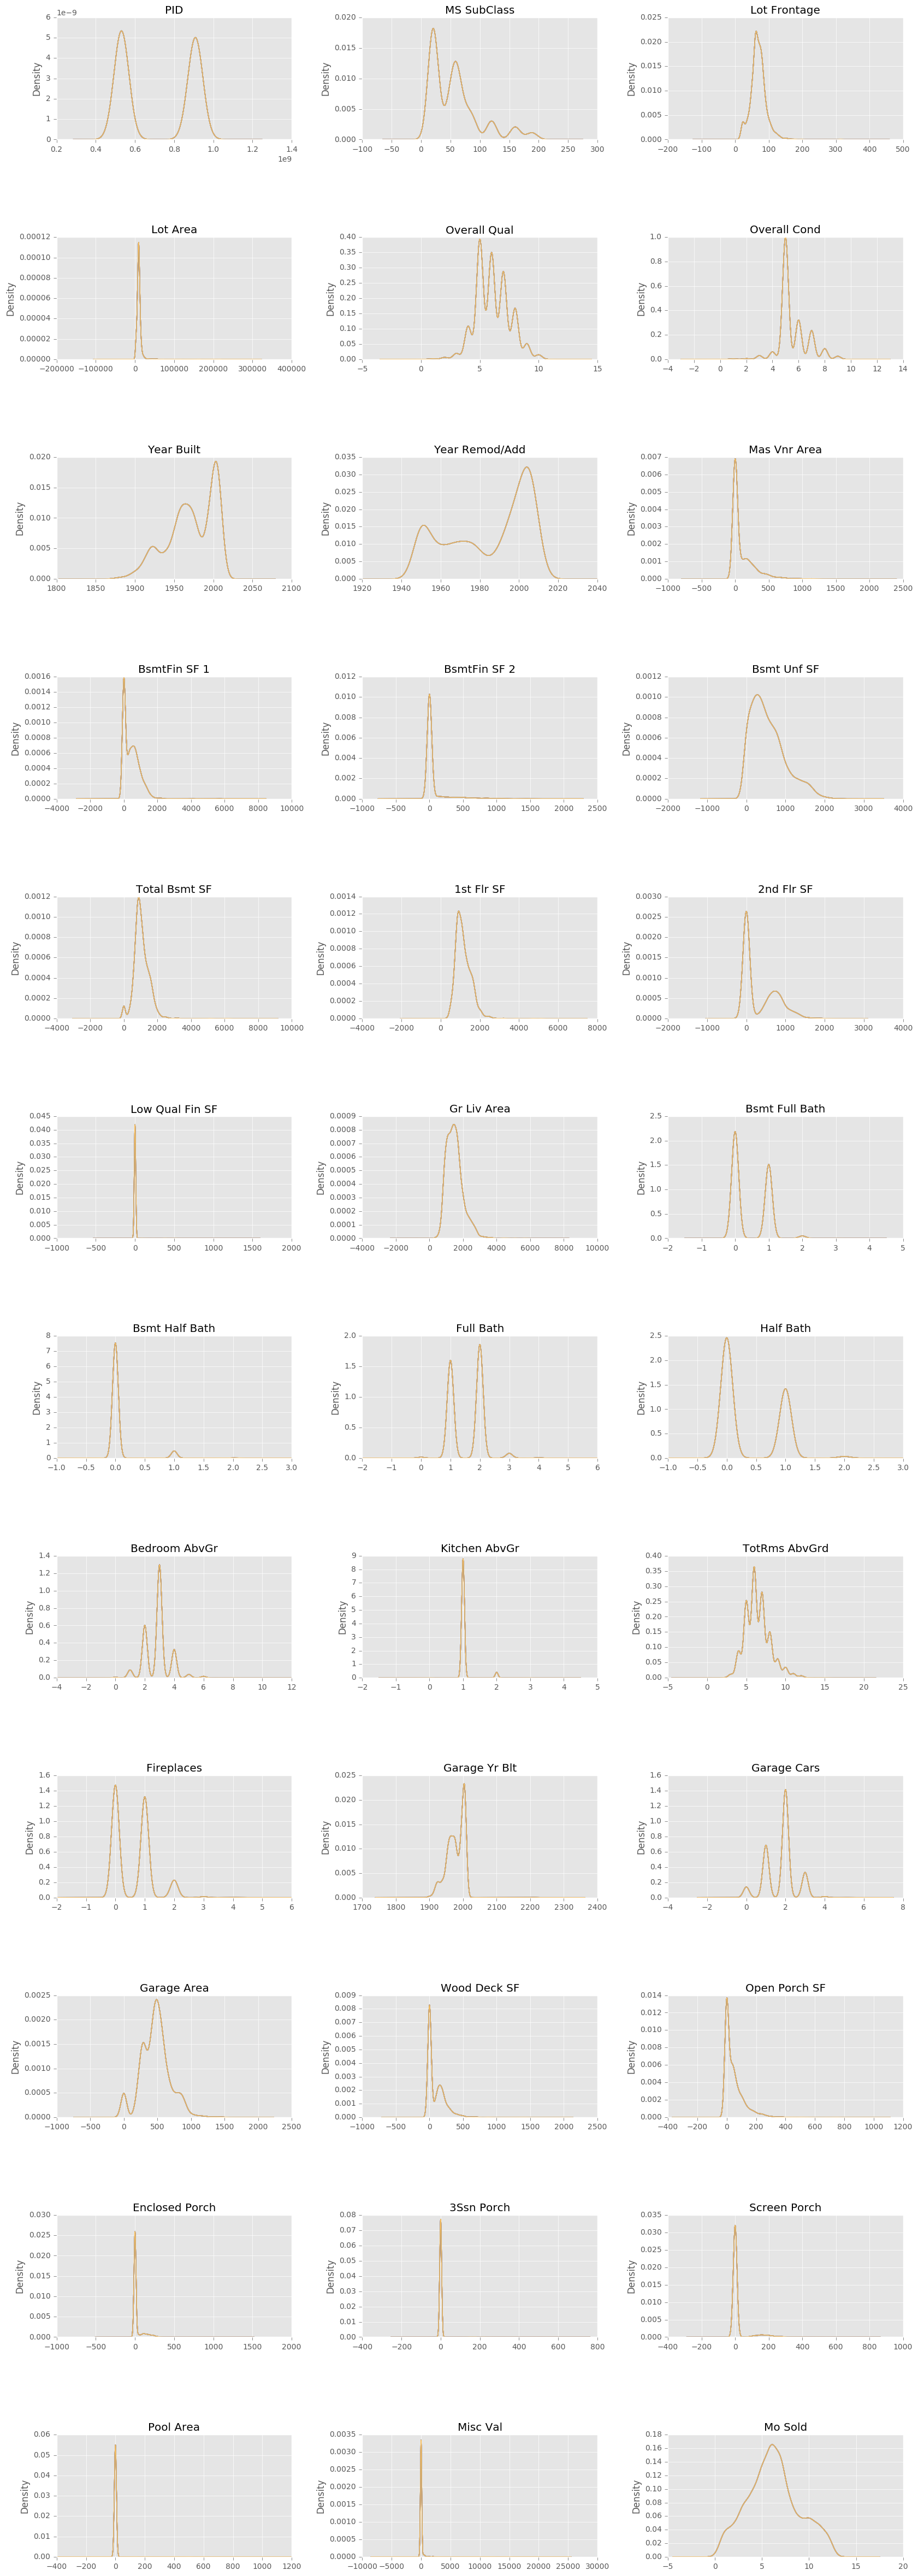

In [25]:
#numeric 
num_df = df.select_dtypes(include=['float64','int64'])
n_cols = 3
n_rows = len(num_df.columns) / n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize = (20,60))

fig.subplots_adjust(hspace=.9, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

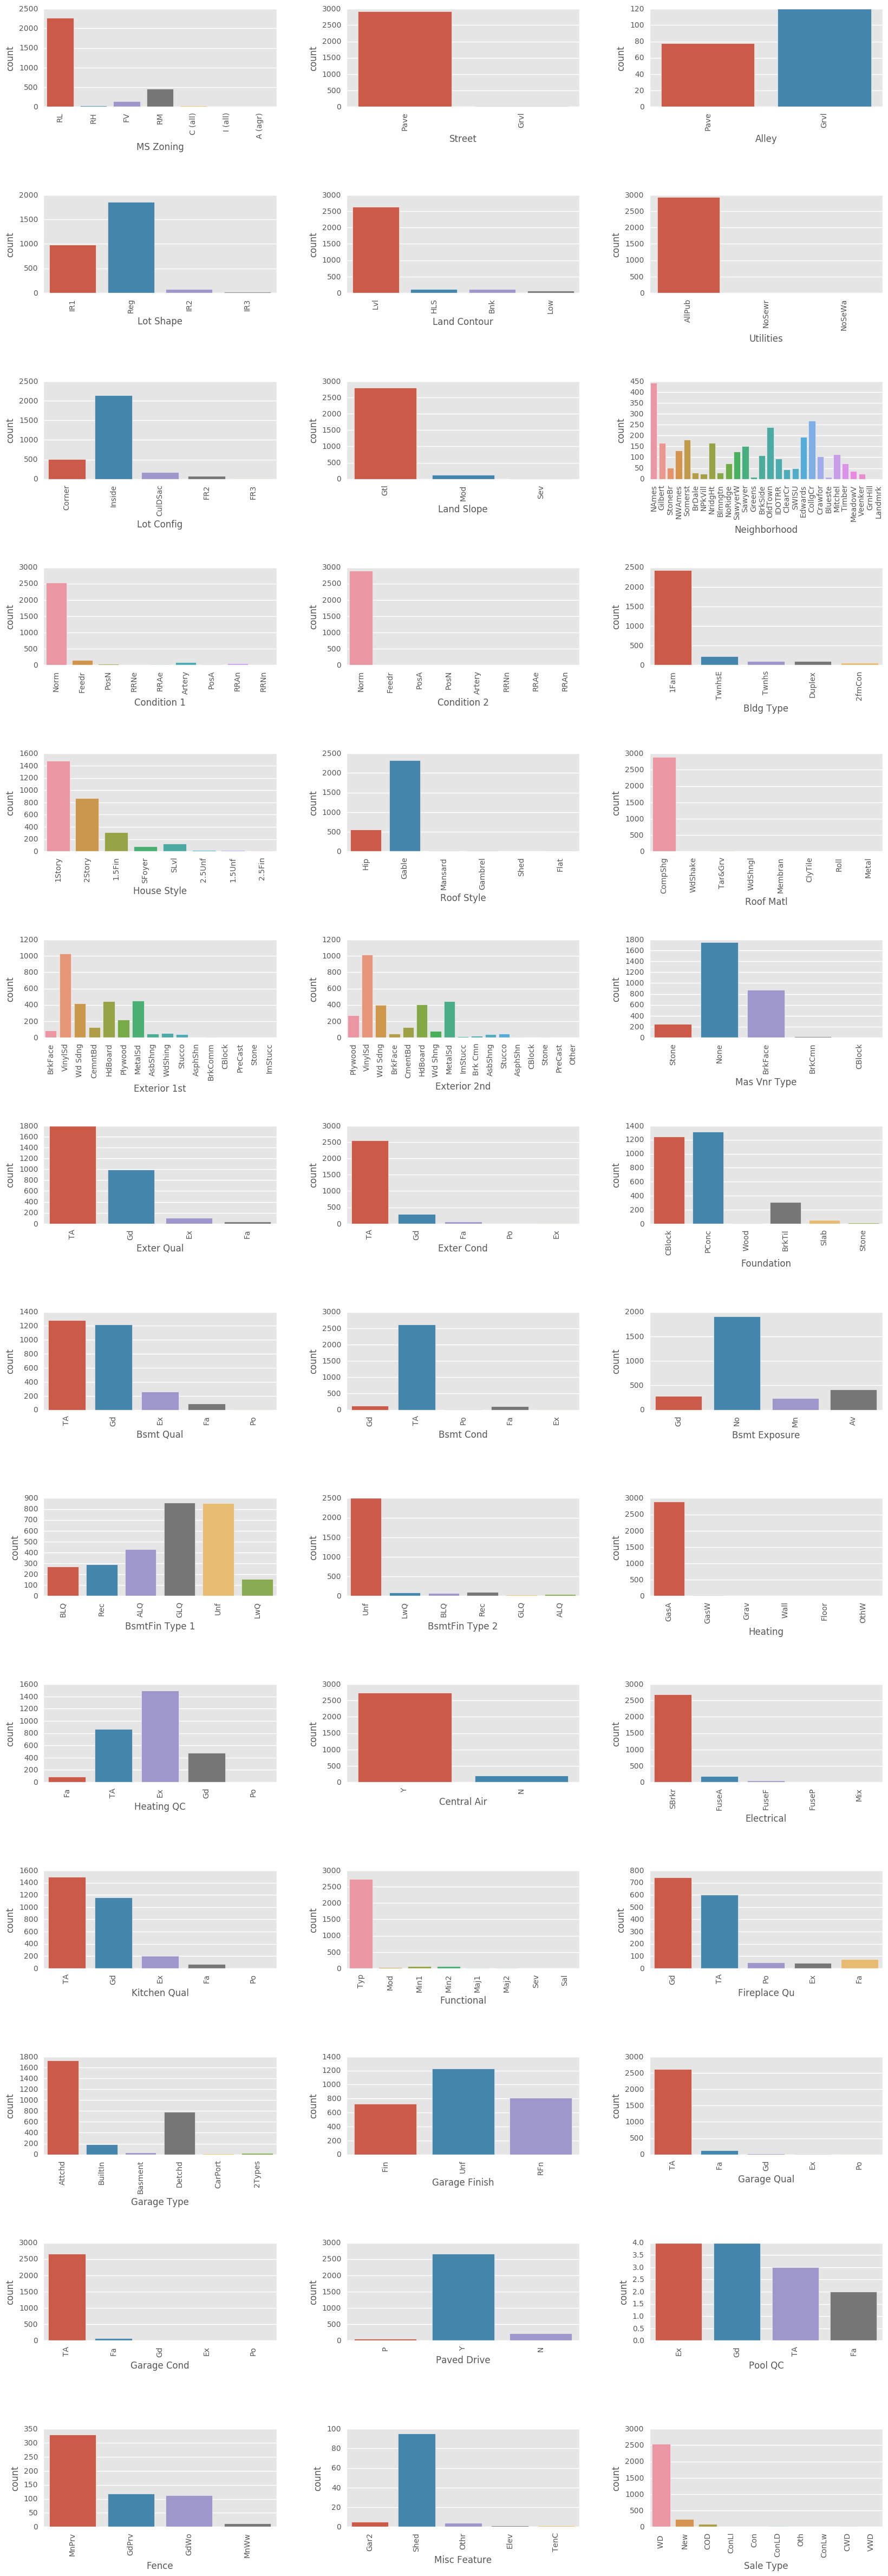

In [130]:
#object features
obj_df = df.select_dtypes(include=['object'])
n_cols = 3
n_rows = len(obj_df.columns) / n_cols

fig, axs = plt.subplots(n_rows,3, figsize = (20,60))

fig.subplots_adjust(hspace=.9, wspace=.3)

for k in axs:
    for i,j in zip(obj_df.columns, axs.flat):
        g = sns.countplot(x=i, data=obj_df, ax=j)
        plt.setp(j.get_xticklabels(), rotation=90)

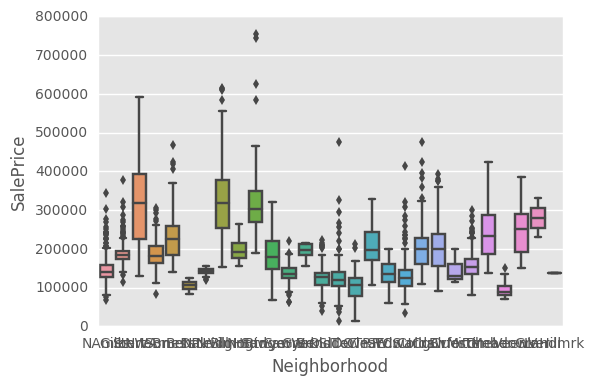

In [241]:
# plot price per neighborhood
ax = plt.axes()
plot1 = sns.boxplot(data=df, x='Neighborhood', y='SalePrice')

In [131]:
# print correlation of numeric features
numeric_features = num_df.columns
pearson = df[numeric_features].corr(method='pearson')
corr_with_target = pearson.ix[-1][1:-1]
corr_with_target = corr_with_target[corr_with_target.argsort()]
print corr_with_target

Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
                     ...   
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0.706780
Overall Qual       0.799262
Name: SalePrice, dtype: float64


/Users/maxwellbates/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/maxwellbates/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/maxwellbates/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/maxwellbates/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


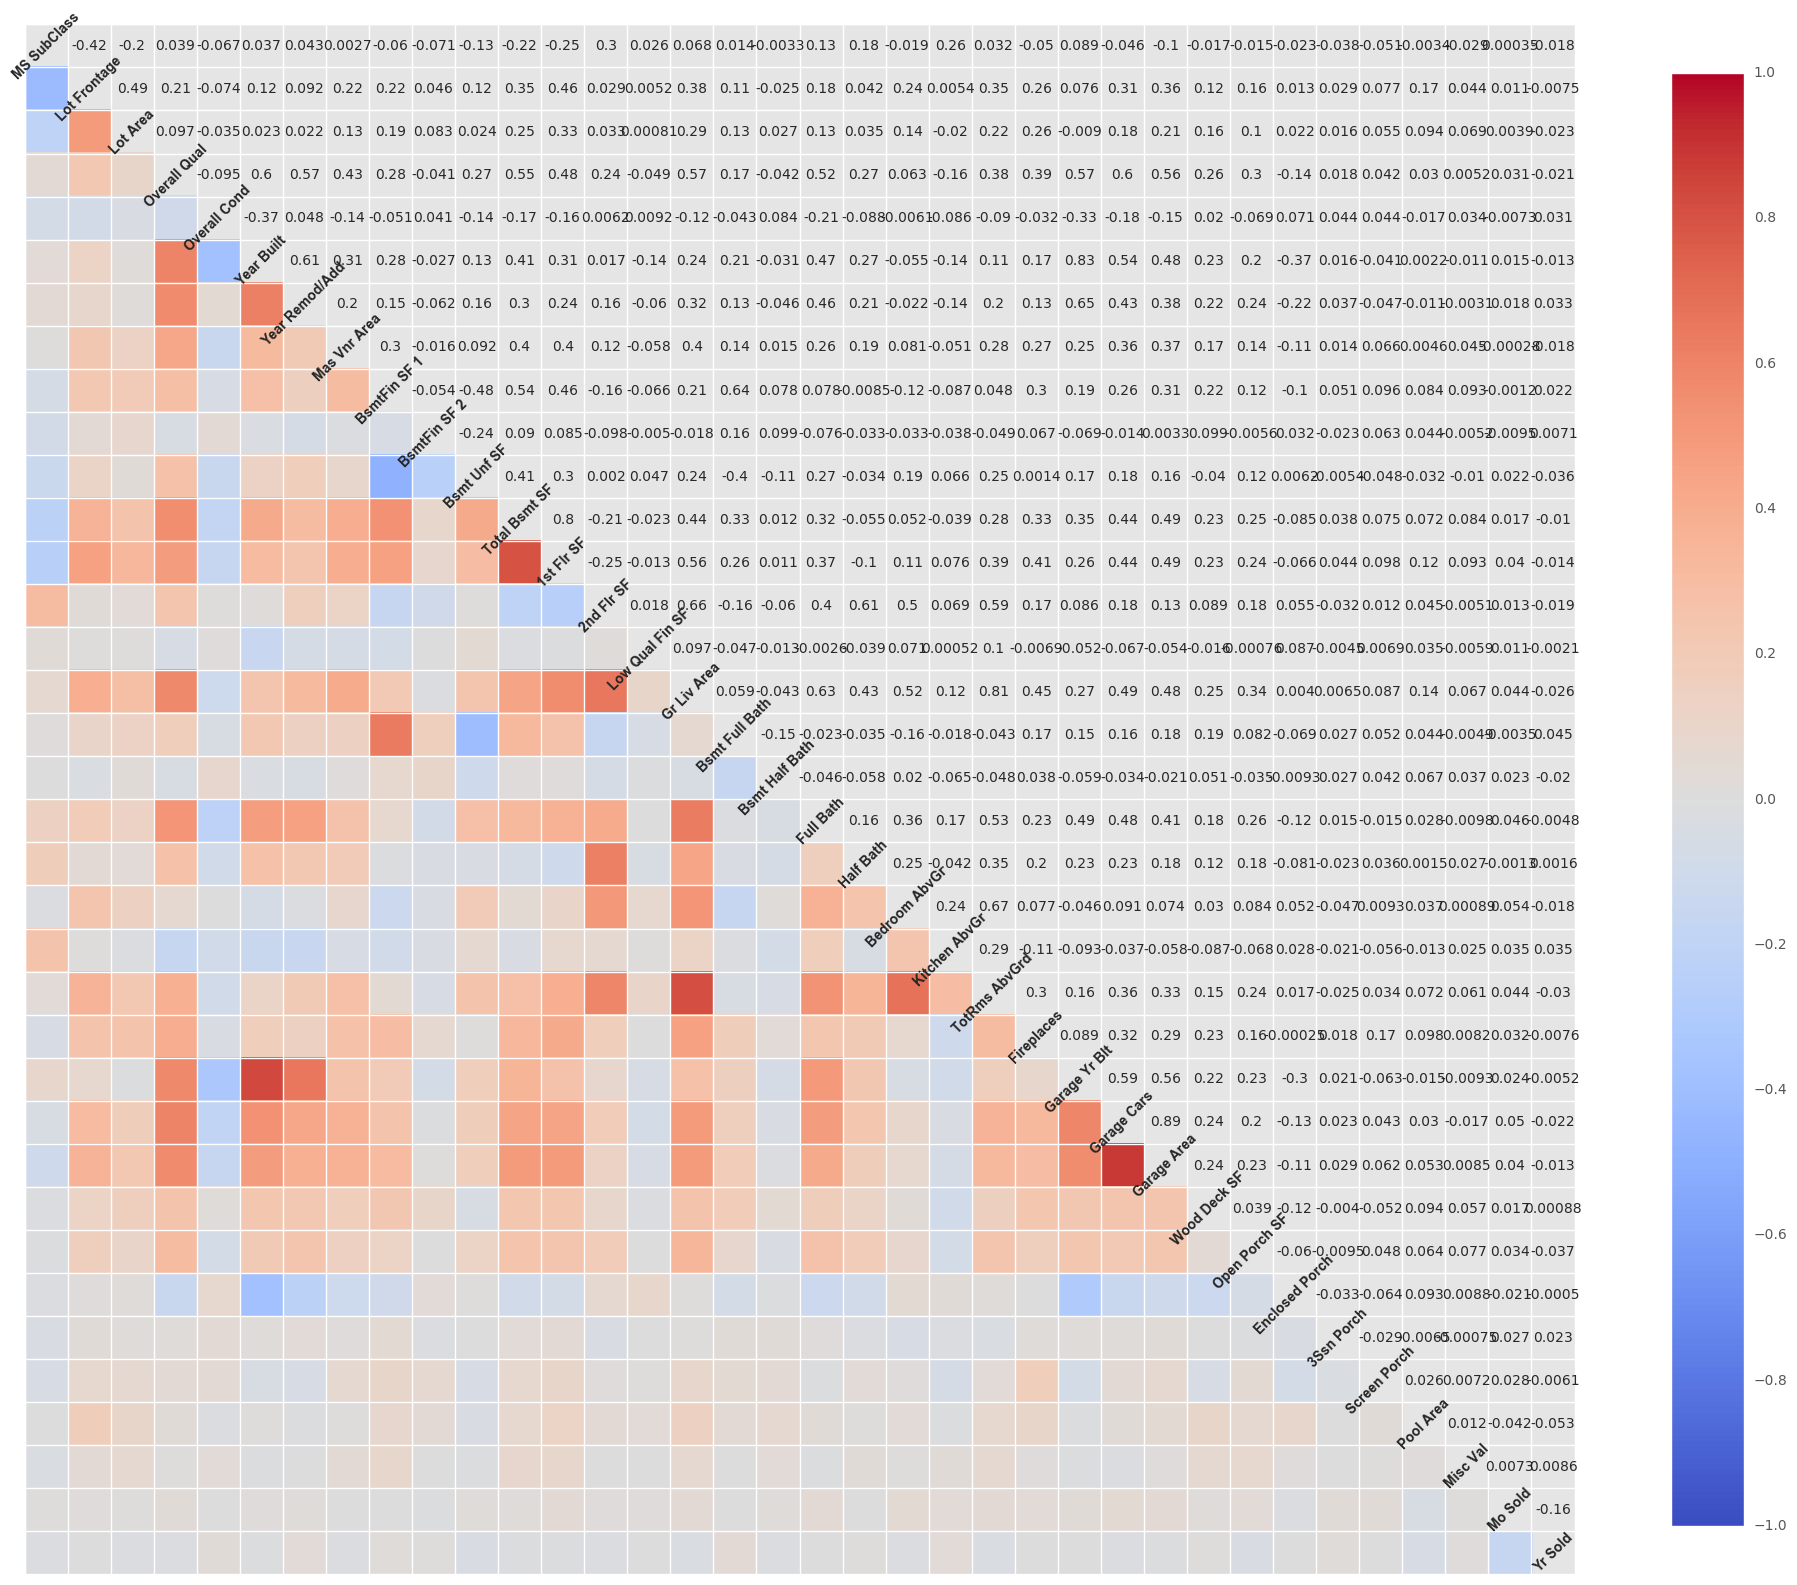

In [66]:
# plot correlation of numeric features
fig, ax = plt.subplots(figsize=(25, 25))
sns.linearmodels.corrplot(df[numeric_features[1:-1]], ax=ax)

In [189]:
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        perc = round(float(nulls)/df.shape[0], 2) * 100
        print(str(perc) +'% \t ' + str(nulls) + '\t' + column)

17.0% 	 490	Lot Frontage
93.0% 	 2732	Alley
1.0% 	 23	Mas Vnr Type
1.0% 	 23	Mas Vnr Area
3.0% 	 80	Bsmt Qual
3.0% 	 80	Bsmt Cond
3.0% 	 83	Bsmt Exposure
3.0% 	 80	BsmtFin Type 1
0.0% 	 1	BsmtFin SF 1
3.0% 	 81	BsmtFin Type 2
0.0% 	 1	BsmtFin SF 2
0.0% 	 1	Bsmt Unf SF
0.0% 	 1	Total Bsmt SF
0.0% 	 1	Electrical
0.0% 	 2	Bsmt Full Bath
0.0% 	 2	Bsmt Half Bath
49.0% 	 1422	Fireplace Qu
5.0% 	 157	Garage Type
5.0% 	 159	Garage Yr Blt
5.0% 	 159	Garage Finish
0.0% 	 1	Garage Cars
0.0% 	 1	Garage Area
5.0% 	 159	Garage Qual
5.0% 	 159	Garage Cond
100.0% 	 2917	Pool QC
80.0% 	 2358	Fence
96.0% 	 2824	Misc Feature


In [190]:
#remove columns which are missing lots of data
limit = .5

cleaned_cols = []
removed_cols = []

print("Train Columns with Nulls > 50%\n")
for column in df:
    nulls = df[column].isnull().sum()
    perc = float(nulls) / df.shape[0]
    if perc > limit:
        print("Removing " + column)
        removed_cols.append(column)
    else:
        cleaned_cols.append(column)
        
cleaned = df.drop(removed_cols, axis=1)
cleaned

Train Columns with Nulls > 50%

Removing Alley
Removing Pool QC
Removing Fence
Removing Misc Feature


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,...,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,...,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,...,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,...,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,...,3,2010,WD,Normal,189900
6,527105030,60,RL,78.0,9978,...,6,2010,WD,Normal,195500
7,527127150,120,RL,41.0,4920,...,4,2010,WD,Normal,213500
8,527145080,120,RL,43.0,5005,...,1,2010,WD,Normal,191500
9,527146030,120,RL,39.0,5389,...,3,2010,WD,Normal,236500


In [191]:
# how many undefined values do we have
import operator
sorted(dict(cleaned.isnull().sum()).items(), key=operator.itemgetter(1))

[('3Ssn Porch', 0),
 ('1st Flr SF', 0),
 ('Heating QC', 0),
 ('Central Air', 0),
 ('Roof Matl', 0),
 ('Land Slope', 0),
 ('Year Remod/Add', 0),
 ('Wood Deck SF', 0),
 ('Overall Cond', 0),
 ('SalePrice', 0),
 ('Fireplaces', 0),
 ('Pool Area', 0),
 ('Kitchen Qual', 0),
 ('PID', 0),
 ('Utilities', 0),
 ('House Style', 0),
 ('Condition 1', 0),
 ('Condition 2', 0),
 ('Enclosed Porch', 0),
 ('Sale Condition', 0),
 ('Screen Porch', 0),
 ('Kitchen AbvGr', 0),
 ('Open Porch SF', 0),
 ('Mo Sold', 0),
 ('Full Bath', 0),
 ('Foundation', 0),
 ('Paved Drive', 0),
 ('Gr Liv Area', 0),
 ('Heating', 0),
 ('Lot Config', 0),
 ('Low Qual Fin SF', 0),
 ('Year Built', 0),
 ('Exterior 1st', 0),
 ('Land Contour', 0),
 ('Yr Sold', 0),
 ('MS SubClass', 0),
 ('Bldg Type', 0),
 ('Half Bath', 0),
 ('Sale Type', 0),
 ('MS Zoning', 0),
 ('Roof Style', 0),
 ('TotRms AbvGrd', 0),
 ('Lot Shape', 0),
 ('Neighborhood', 0),
 ('Exterior 2nd', 0),
 ('Bedroom AbvGr', 0),
 ('2nd Flr SF', 0),
 ('Exter Cond', 0),
 ('Lot Area', 



# todo - lots of null cleaning and impute nulls where appropriate



In [192]:
# impute values
# for now, lets just populate with the mean
# when regularize, they will effectively go to zero
cleaned = cleaned.fillna(cleaned.mean())

In [193]:
#regularize our features, taking log of skewed features
#to correct for cleaning above, really should more explicitly center as well
from scipy.stats import skew

def regularize_df(df):
    skew_max = .75
    numeric_features = df.select_dtypes(include=['float64','int64']).columns
    skewed_feats = df[numeric_features].apply(lambda x: skew(x.dropna())) #compute skewness
    skewed_feats = skewed_feats[skewed_feats > skew_max]
    skewed_feats = skewed_feats.index
    df[skewed_feats] = np.log1p(df[skewed_feats])
    return df
    
regularize_df(cleaned)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,
1,526301100,3.044522,RL,4.955827,10.366309,...,5,2010,WD,Normal,12.278398
2,526350040,3.044522,RH,4.394449,9.360741,...,6,2010,WD,Normal,11.561725
3,526351010,3.044522,RL,4.406719,9.565775,...,6,2010,WD,Normal,12.055256
4,526353030,3.044522,RL,4.543295,9.320181,...,4,2010,WD,Normal,12.404928
5,527105010,4.110874,RL,4.317488,9.534668,...,3,2010,WD,Normal,12.154258
6,527105030,4.110874,RL,4.369448,9.208238,...,6,2010,WD,Normal,12.183321
7,527127150,4.795791,RL,3.737670,8.501267,...,4,2010,WD,Normal,12.271397
8,527145080,4.795791,RL,3.784190,8.518392,...,1,2010,WD,Normal,12.162648
9,527146030,4.795791,RL,3.688879,8.592301,...,3,2010,WD,Normal,12.373708


In [194]:
# Transform a df with categorical values into all dumies + numeric
def transform_dummy(df):
    object_columns = df.columns[df.dtypes == 'object']
    # print('Object columns: ' + str(len(object_columns)))
    object_dummies = pd.get_dummies(df[object_columns], drop_first = False)
    # print('Dummied columns: ' + str(object_dummies.shape[1]))

    # new dataframe 
    new_train_x = pd.concat([df, object_dummies], axis=1)
    nonobject_columns = new_train_x.columns[new_train_x.dtypes != "object"]
    nonobject_columns = nonobject_columns[1:] # remove pid
    # print('Total columns: ' + str(len(nonobject_columns)))
    new_train_x = new_train_x[nonobject_columns]

    return(new_train_x)

In [195]:
dummied = transform_dummy(cleaned)
dummied

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,...,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
Order,,,,,,,,,,,
1,3.044522,4.955827,10.366309,6,5,...,0,0,0,1,0
2,3.044522,4.394449,9.360741,5,6,...,0,0,0,1,0
3,3.044522,4.406719,9.565775,6,6,...,0,0,0,1,0
4,3.044522,4.543295,9.320181,7,5,...,0,0,0,1,0
5,4.110874,4.317488,9.534668,5,5,...,0,0,0,1,0
6,4.110874,4.369448,9.208238,6,6,...,0,0,0,1,0
7,4.795791,3.737670,8.501267,8,5,...,0,0,0,1,0
8,4.795791,3.784190,8.518392,8,5,...,0,0,0,1,0
9,4.795791,3.688879,8.592301,8,5,...,0,0,0,1,0


# Simple Linear

In [196]:
# would make sense to have a validation set too...

X = dummied.drop('SalePrice', axis=1)
y = dummied['SalePrice']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=0)

In [197]:
#linear regression
lm = linear_model.LinearRegression() 

lm.fit(X_train, y_train)

#coefficients
coef_df = pd.DataFrame({'features':X_train.columns, 'coef':lm.coef_})[['features','coef']]
print(coef_df.sort_values(['coef'], ascending=[False])[:10]) #high coef
print(coef_df.sort_values(['coef'], ascending=[True])[:10]) #low coef

#pred
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

                 features      coef
140   Exterior 1st_CBlock  0.556000
15            Gr Liv Area  0.472397
74   Neighborhood_GrnHill  0.444638
130     Roof Matl_Membran  0.404803
131       Roof Matl_Metal  0.364143
260        Garage Qual_Ex  0.287527
135     Roof Matl_WdShngl  0.248563
245        Functional_Typ  0.230809
134     Roof Matl_WdShake  0.227842
39      MS Zoning_I (all)  0.206968
                 features      coef
128     Roof Matl_ClyTile -1.592605
243        Functional_Sal -0.893213
156   Exterior 2nd_CBlock -0.687797
36      MS Zoning_A (agr) -0.512761
171   Mas Vnr Type_CBlock -0.434259
190          Bsmt Qual_Fa -0.218759
263        Garage Qual_Po -0.217259
191          Bsmt Qual_Gd -0.206269
193          Bsmt Qual_TA -0.201290
141  Exterior 1st_CemntBd -0.190843
('Train RMSE:', 0.095963912601956983)
('Test RMSE:', 0.14429939639048026)


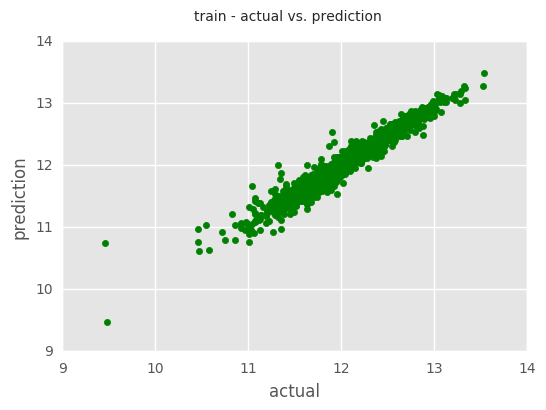

In [198]:
plt.scatter(y_train, pred_train,  color='g')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.suptitle('train - actual vs. prediction')

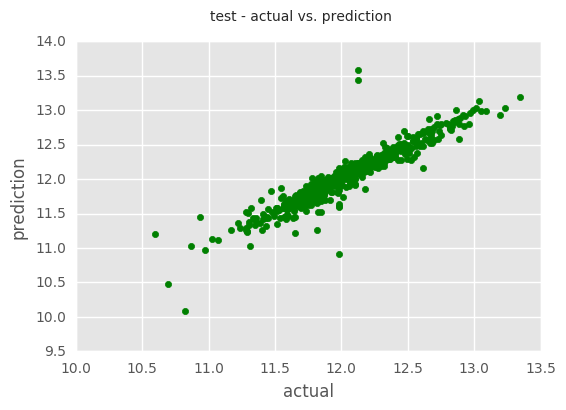

In [199]:
plt.scatter(y_test, pred_test,  color='g')
plt.xlabel('actual')
plt.ylabel('prediction')
plt.suptitle('test - actual vs. prediction')

# Lasso

In [231]:
model_lasso = linear_model.LassoCV(alphas = [1, 0.1, 0.001, 0.0005, 0.00001]).fit(X_train, y_train)

In [232]:
np.sqrt(-cross_validation.cross_val_score(model_lasso, X_train, y_train, scoring="mean_squared_error", cv = 5))

array([ 0.12652542,  0.10351102,  0.11360806,  0.15678693,  0.10572372])

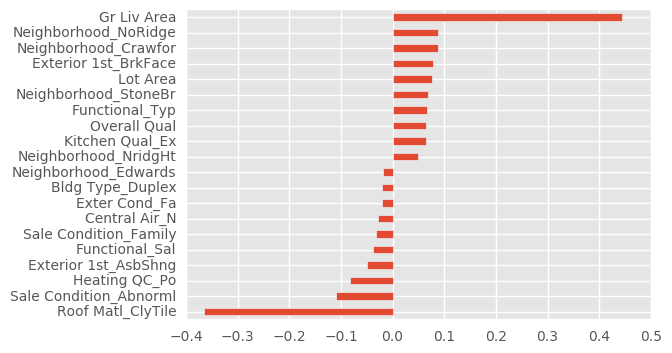

In [233]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
important_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
important_coef.plot(kind = "barh")

In [234]:
#predict

pred_train = model_lasso.predict(X_train)
pred_test = model_lasso.predict(X_test)

print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

('Train RMSE:', 0.11068942868679719)
('Test RMSE:', 0.13391614479918909)


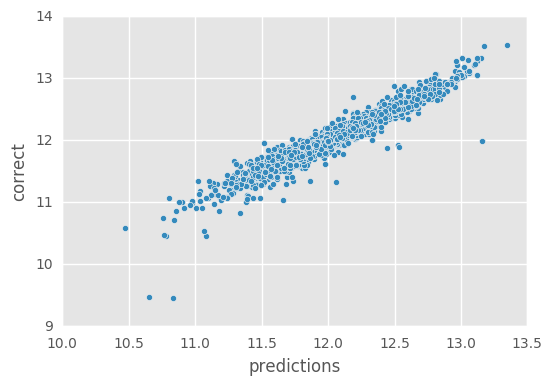

In [235]:
predictions = model_lasso.predict(X_train)
predict = pd.DataFrame({
        "predictions": predictions,
        "correct": y_train,
        "residual": y_train - predictions
})
predict.plot(x = "predictions", y = "correct",kind = "scatter")